Dataset Name:
Estimation of Obesity Levels Based On Eating Habits and Physical Condition

Reason:
It contained with large number of samples and features also. It include with medical and biological relevance (obsity prediction) and also include physiological relevance. So I think that data set is more suitable for regression modeling.

2111 samples

17 features

Features:

Gender - Male/Female                
Age - Age in years               
Height - Height in meters           
Weight - Body weight (kg)           
family_history_with_overweight - Family obesity history     
FAVC - Frequent high-calorie food
FCVC - Vegetable consumption      
NCP - Number of meals            
CAEC - Eating between meals       
SMOKE - Smoking                    
CH2O - Water consumption          
SCC - Calorie monitoring         
FAF - Physical activity          
TUE - Technology use             
CALC - Alcohol consumption        
MTRANS - Transport mode             
NObeyesdad - Obesity category    


Part B

1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.shape

(2111, 17)

In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [11]:
X = df.drop("Weight", axis=1)
y = df["Weight"]

In [33]:
X_train,X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state=42
)

In [34]:
print("Training samples: ", X_train.shape[0])
print("Testing samples: ", X_test.shape[0])

Training samples:  1688
Testing samples:  423


Linear Regression

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

SVR

In [36]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

Random forest

In [37]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


2.

In [38]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [39]:
lr_metrics = evaluate_model(y_test, lr_pred)
svr_metrics = evaluate_model(y_test, svr_pred)
rf_metrics = evaluate_model(y_test, rf_pred)

metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "SVR", "Random Forest"],
    "MAE": [lr_metrics[0], svr_metrics[0], rf_metrics[0]],
    "MSE": [lr_metrics[1], svr_metrics[1], rf_metrics[1]],
    "RMSE": [lr_metrics[2], svr_metrics[2], rf_metrics[2]],
    "R2": [lr_metrics[3], svr_metrics[3], rf_metrics[3]]
})

metrics_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,13.893768,286.345489,16.921746,0.593900
1,SVR,18.867812,562.749723,23.722346,0.201899
2,Random Forest,1.647566,8.189610,2.861749,0.988385


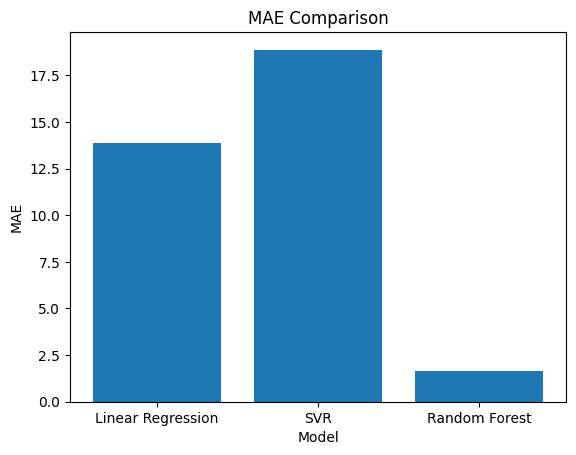

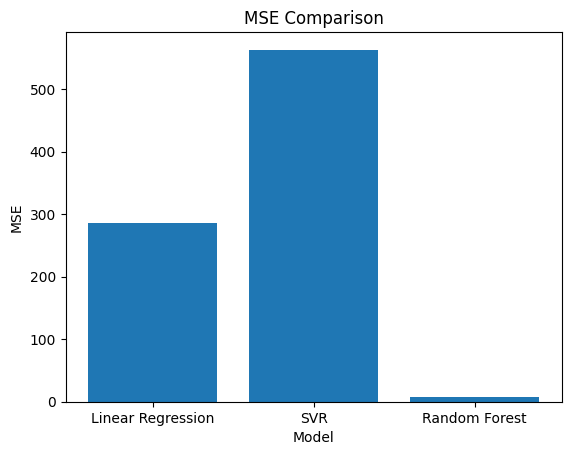

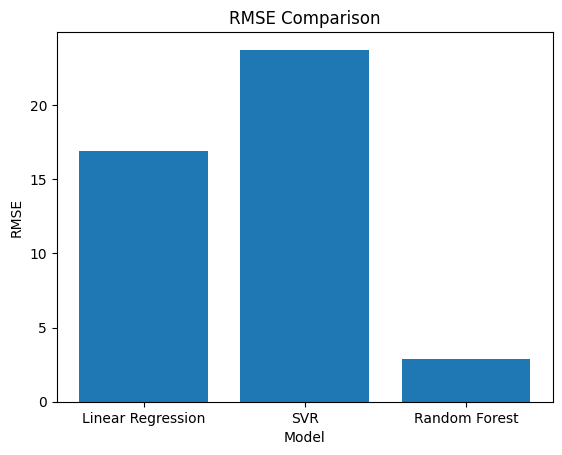

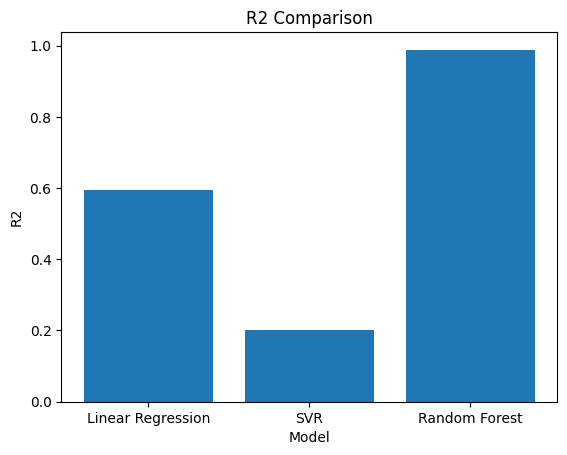

In [40]:
metrics = ["MAE", "MSE", "RMSE", "R2"]

for metric in metrics:
    plt.figure()
    plt.bar(metrics_df["Model"], metrics_df[metric])
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.title(metric + " Comparison")
    plt.show()

In my MSE and RMSE values show SVR shows largest prediction errors. And So SVR model was the highest risk of servere misprediction because MSE and RMSE valuse show high values for SVR model. MSE and RMSE shows the prediction errors in those models.

The model with low values in MAE and RMSE plots that model was more stable. So in my observation Random forest is the most reliable and stable for predictions.

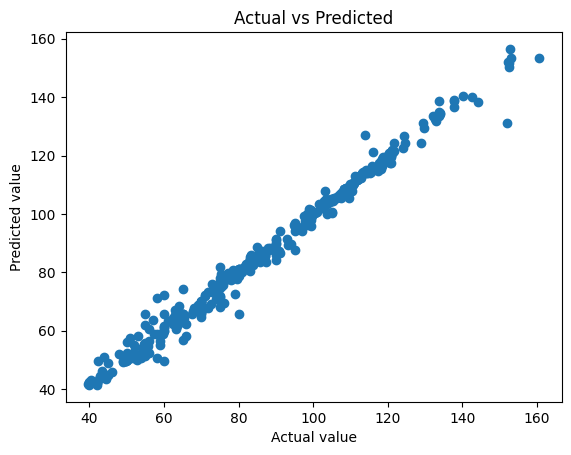

In [41]:
plt.figure()
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted")
plt.show()

With based on my plot that model not related to strong overestimate and understimate also. So with high predictions accuracy also.

In my R2 scores Random forest have high value. So Random forest explains the highest proportion of biological variation in that. It implies
eating habits, lifestyle and physical features strongly influence body weight.

In my regression metrics MAE, MSE, RMSE valuse are lower than other models for random forest. So that gives to idea about random forest have low error prediction with comparing others. And also in R2 score gives high value for Random forest so it also tells us to random forest have higest proportion of biological variation in medical outcome. So I thonk random forest is best for that.